In [0]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns 

In [0]:
sns.set_style('white') # Setting the background of the plot white, you can set it to "white" depending on the intensity of the data
data = pd.read_csv("data.csv")
data.dtypes
print("The size of the dataset:",data)

The size of the dataset:              action_type combined_shot_type  ...  opponent  shot_id
0              Jump Shot          Jump Shot  ...       POR        1
1              Jump Shot          Jump Shot  ...       POR        2
2              Jump Shot          Jump Shot  ...       POR        3
3              Jump Shot          Jump Shot  ...       POR        4
4      Driving Dunk Shot               Dunk  ...       POR        5
...                  ...                ...  ...       ...      ...
30692          Jump Shot          Jump Shot  ...       IND    30693
30693           Tip Shot           Tip Shot  ...       IND    30694
30694  Running Jump Shot          Jump Shot  ...       IND    30695
30695          Jump Shot          Jump Shot  ...       IND    30696
30696          Jump Shot          Jump Shot  ...       IND    30697

[30697 rows x 25 columns]


In [0]:
print(data.head())

         action_type combined_shot_type  ...  opponent  shot_id
0          Jump Shot          Jump Shot  ...       POR        1
1          Jump Shot          Jump Shot  ...       POR        2
2          Jump Shot          Jump Shot  ...       POR        3
3          Jump Shot          Jump Shot  ...       POR        4
4  Driving Dunk Shot               Dunk  ...       POR        5

[5 rows x 25 columns]


In [0]:
df_train = data[data['shot_made_flag'].notnull()]
print("The shape of the training set is :",df_train.shape)

The shape of the training set is : (25697, 25)


(-100, 500)

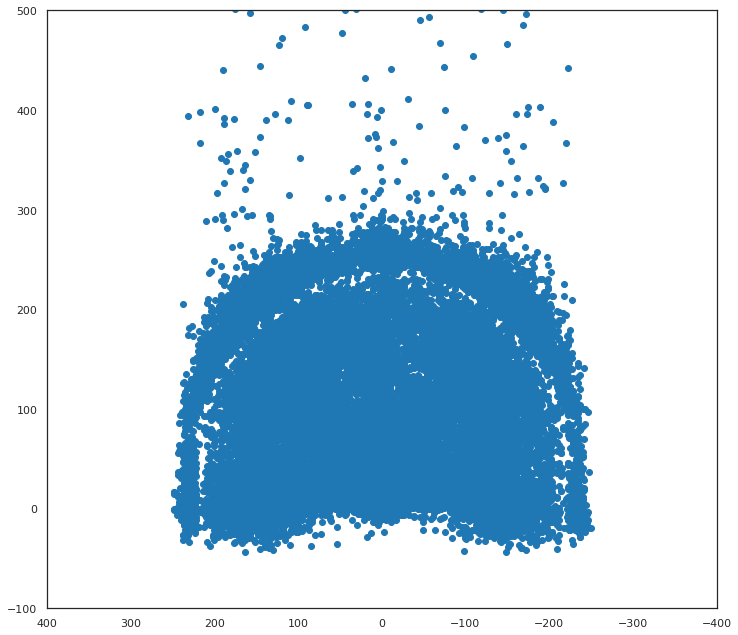

In [0]:
# To create a basic scatter plot to show the shot selection by kobe
 sns.set_context("notebook") # setting the preset contexts 
 sns.set_color_codes() 
 plt.figure(figsize=(12,11)) #The purpose of using plt.figure() is to create a figure object.The whole figure is regarded as the figure object. It is necessary to explicitly use plt.figure() when we want to tweak the size of the figure and when we want to add multiple Axes objects in a single figure.
 plt.scatter(data["loc_x"],data["loc_y"])
 # note that x-axis values are the inverse of what they actually should be 
 plt.xlim(400,-400)
 plt.ylim(-100,500)

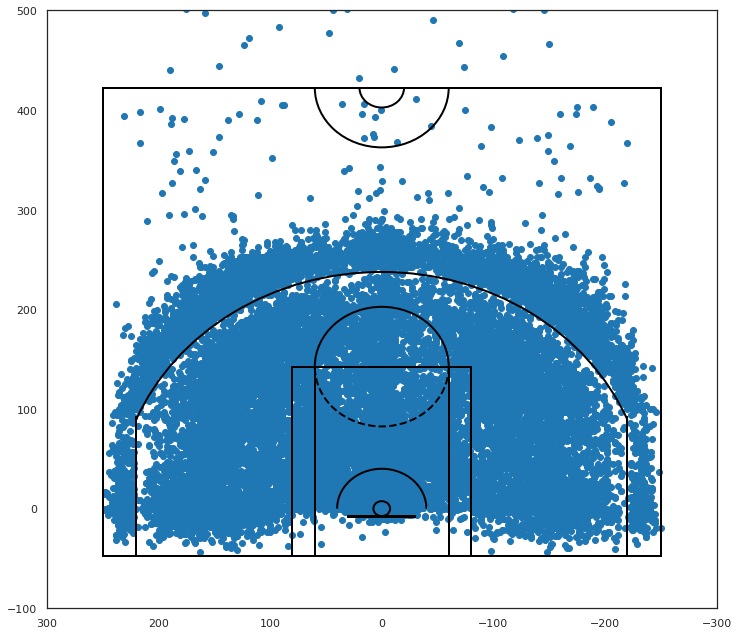

In [0]:
# Time to add a basket ball court to the analysis
# Thanks to the brilliant peice of code by Micheal Krugger in Kaggle that helped me create the framework of the basketball court. 

from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None,color='black',lw=2,outer_lines=False):
  if ax is None:
    ax=plt.gca()   #gca means "get current axes". Current" here means that it provides a handle to the last active axes. If there is no axes yet, an axes will be created

#To create a basketball hoop , that means its radius according to the NBA standards is 9" which is 7.5 according to our coordinate system
  hoop= Circle((0,0),radius=7.5,linewidth=lw,color=color,fill=False)

# Create backboard
  backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

#Now we have to create the inner and the outer rectangles for the Paint. I havent played much basketball in my life so this exercise helps me to know the technical terms
#width=16ft, height=19ft   
  outer_rect = Rectangle((-80,-47.5),160,190,linewidth=lw, color=color,fill=False)
#widt=12ft, height=19ft
  inner_rect = Rectangle((-60,-47.5),120,190,linewidth=lw, color=color,fill=False)

#Create Arc for free throw.
#Top free throw 
  top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
#Create free throw bottom arc
  bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
#Restricted Zone, it is an arc with 4ft radius from center of the hoop
  restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

# Three point line
# Create the side 3pt lines, they are 14ft long before they begin to arc
  corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
  corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
# I just played around with the theta values until they lined up with the threes
  three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

# Center Court
  center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
  center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

# List of the court elements to be plotted onto the axes
  court_elements = [hoop, backboard, outer_rect, inner_rect, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]


  if outer_lines:
# Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
    court_elements.append(outer_lines)

# Add the court elements onto the axes
  for element in court_elements:
    ax.add_patch(element)

  return ax

# let's draw the court
plt.figure(figsize=(12,11))
plt.scatter(df_train['loc_x'],df_train['loc_y'])
draw_court(outer_lines=True)

# and now draw the shots
plt.ylim(-100,500)
plt.xlim(300,-300)
plt.show()
   



So he basically shoots from everywhere but doesn't like to shoot just inside the 3-pointline. He also doesn't like the left corner too much.

Now we have to take a look at the areas where we can identify the Kobe's selection is a hit. 

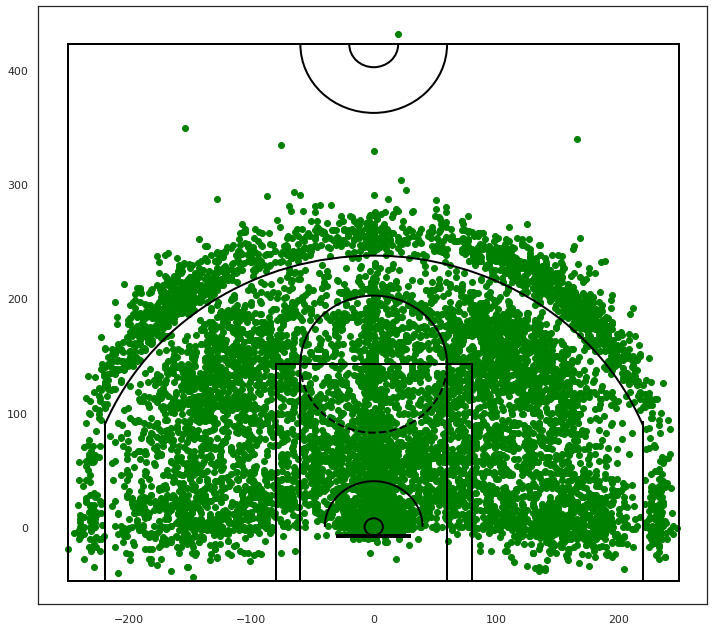

In [0]:
plt.figure(figsize=(12,11))
h = df_train.loc[df_train.shot_made_flag==1]
plt.scatter(h.loc_x,h.loc_y,marker='o',color='green')
draw_court(outer_lines=True)

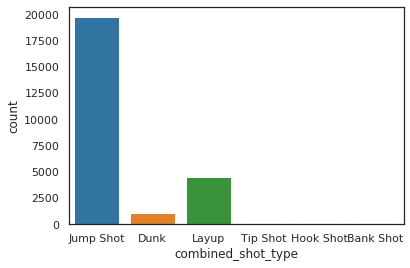

In [0]:
# Now we want to see what percentage of shots did Kobe hit in various ways
h["combined_shot_type"].value_counts()
sns.countplot(x='combined_shot_type',data=df_train)

In [0]:
frequency_shots_areas = h['combined_shot_type'].value_counts(normalize =True)
print ("The percentage of combined shots (hit)")
print(frequency_shots_areas*100)

The percentage of combined shots (hit)
Jump Shot    67.230702
Layup        22.337549
Dunk          8.547754
Bank Shot     0.828609
Hook Shot     0.593109
Tip Shot      0.462276
Name: combined_shot_type, dtype: float64


Looks like the Lakers star has the numbers of Jump Shot followed by Layup and Dunk

Now we want to see which from which areas specifically did Kobe attempted these shots

Now we explore the areas where we can see Kobe has missed shots.


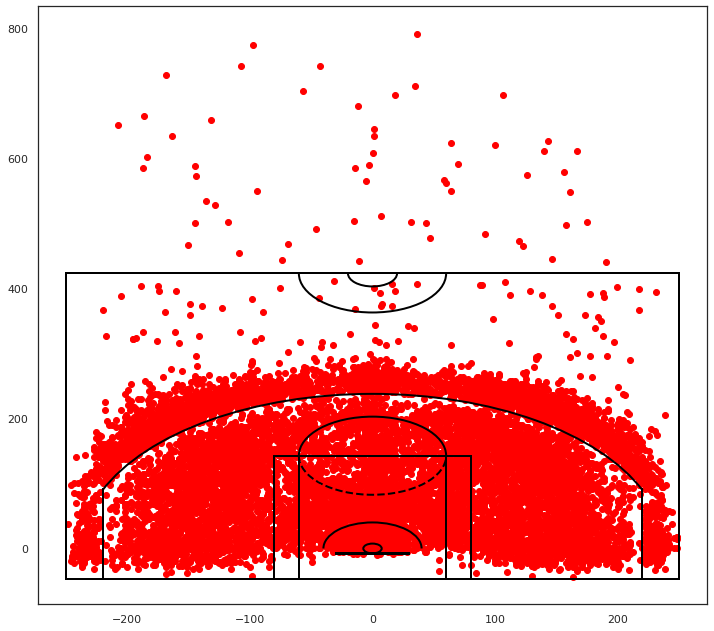

In [0]:
plt.figure(figsize=(12,11))
m = df_train.loc[df_train.shot_made_flag==0]
plt.scatter(m.loc_x,m.loc_y,marker='o',color='red')
draw_court(outer_lines=True)

Seems like Kobe misses from the under the basket area more 

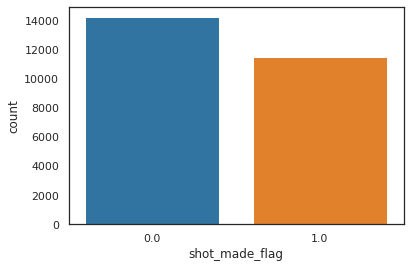

In [0]:
#Shot accuracy using countplot. A countplot can be thought of as a histogram across a categorical, instead of quantitative variable
sns.countplot(x="shot_made_flag",data=df_train)

In [0]:
# Accuracy score
frequency = df_train['shot_made_flag'].value_counts(normalize =True)
print("The hit-miss percentage")
print(frequency*100)

The hit-miss percentage
0.0    55.383897
1.0    44.616103
Name: shot_made_flag, dtype: float64


Looks from the ratio that the Black Mamba hits 45% percent of his shots. Thats some crazy accuracy 

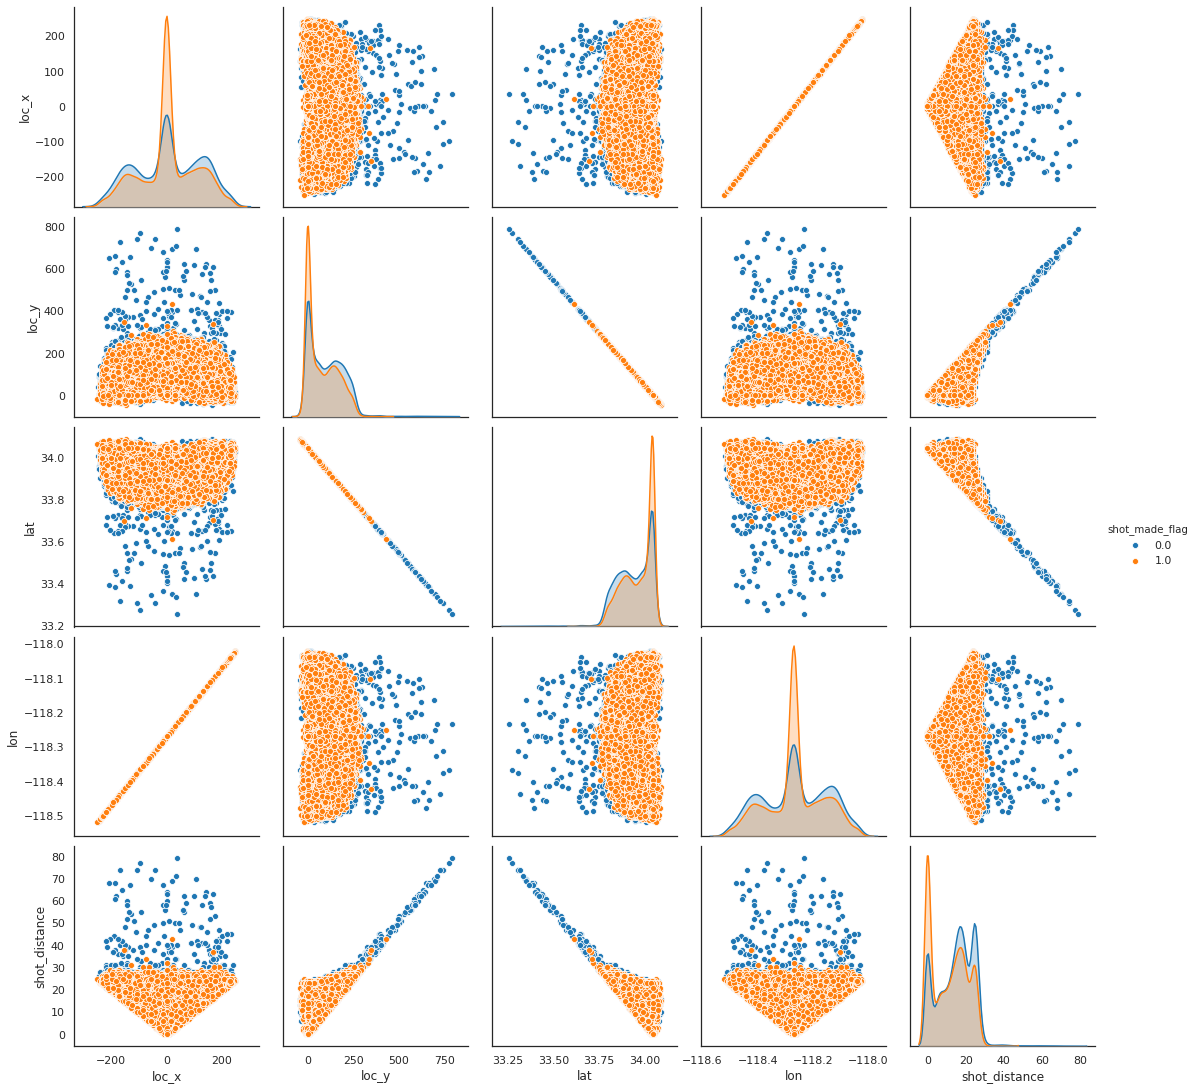

In [0]:
#Visualizing other relationships between the variables using seaborn pairplot function
# A pairs plot allows us to see both distribution of single variables and relationships between two variables
# It plots only the non categorical variables and uses the parameter hue which takes a variable " shot_made_flag "to colorize the points
sns.pairplot(df_train, vars=['loc_x', 'loc_y', 'lat', 'lon', 'shot_distance'], hue='shot_made_flag', height=3)
plt.show()

In [0]:
# Now dropping the variables that we dont need to consider for the analysis of the shot selection
df_train = df_train.drop(['team_name','shot_id','lat','lon','game_event_id','game_id'],axis=1)

Now Lets see, how he fared in the ending seconds of the match. For that we have to make a custom column "Time_Left" by adding the columns of "minutes_remaining" and "seconds_remaining" of the dataset. 

Now the column of the date can be broken down to 4 separate columns 

In [0]:
import warnings
warnings.filterwarnings('ignore')

df_train['game_date'] = pd.to_datetime(df_train['game_date'])
df_train['game_year'] = df_train['game_date'].dt.year
df_train['game_month'] = df_train['game_date'].dt.month
df_train['game_day'] = df_train['game_date'].dt.dayofweek

df_train=df_train.drop('game_date',axis=1)

Now for the remaining columns we have to merge the columns

In [0]:
df_train['Time_before_period_end'] = df_train['minutes_remaining'] * 60 + df_train['seconds_remaining']
df_train['Last_30_secs'] = df_train['Time_before_period_end'] < 30
df_train = df_train.drop(['minutes_remaining','seconds_remaining'],axis=1)

Now that we have single column that explains the time remaining from the end of the period , we can explore the shots he attempted in ending time of the period 

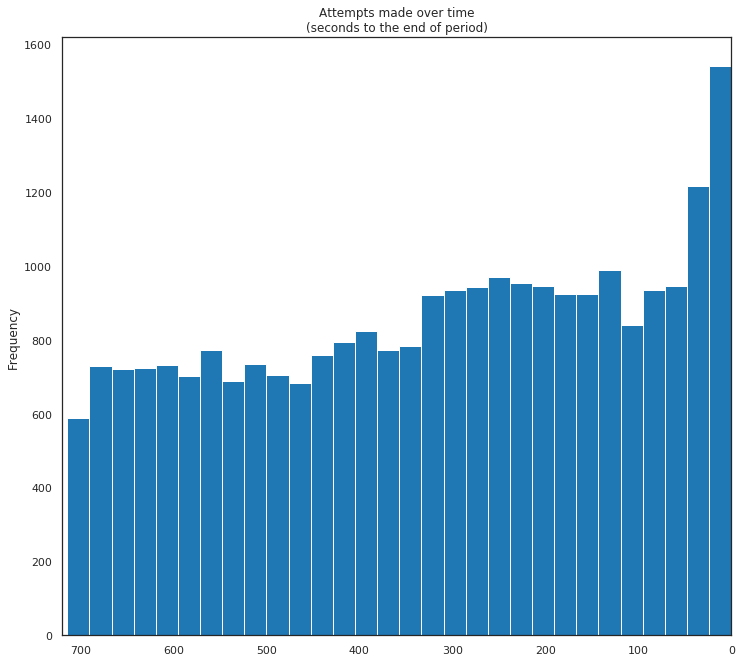

In [0]:
df_train['Time_before_period_end'].plot(kind='hist', bins=30, xlim=(720, 0), figsize=(12,11),
                            title='Attempts made over time\n(seconds to the end of period)')

In [0]:
last_30 = df_train[df_train['Time_before_period_end'] < 30]
last_30['shot_made_flag'].value_counts() /  last_30['shot_made_flag'].shape

0.0    0.666305
1.0    0.333695
Name: shot_made_flag, dtype: float64

Now we have the column of last 30 secs of the game , we can analyze from that how many 3/2pt s he  made in the last seconds





In [0]:
last_30_shot_scored = last_30[last_30['shot_made_flag']==1]
last_30_shot_scored['shot_type'].value_counts()/ last_30_shot_scored['shot_type'].shape

2PT Field Goal    0.741463
3PT Field Goal    0.258537
Name: shot_type, dtype: float64

Kobe was scoring 74% of his shots in 2pters and 26% as 3pters. But dont you think pressure got to him , there was lot of attempts to score but he was able to score only 33% of the time. Lets explore more on this angle. 

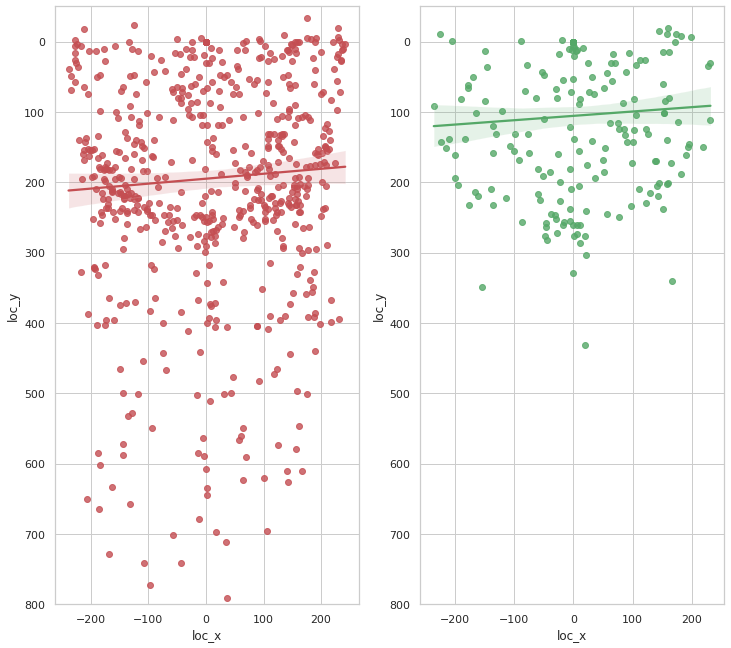

In [0]:
last_5_sec_miss = df_train[(df_train['Time_before_period_end'] < 5) & (df_train['shot_made_flag']==0)]
last_5_sec_hit =  df_train[(df_train['Time_before_period_end'] < 5) & (df_train['shot_made_flag']==1)]

sns.set_style('whitegrid')
f, axrr = plt.subplots(1,2,figsize=(12,11))
axrr[0].set_ylim(800, -50)
axrr[1].set_ylim(800, -50)

sns.regplot(x='loc_x',y='loc_y',ax=axrr[0],data=last_5_sec_miss,color='r')
sns.regplot(x='loc_x',y='loc_y',ax=axrr[1],data=last_5_sec_hit,color='g')

There are some desperate attempts to score towards the end of period. He missed it from the far end and also from the near end that inside the D. 

Text(0.5, 1.0, 'playoffs')

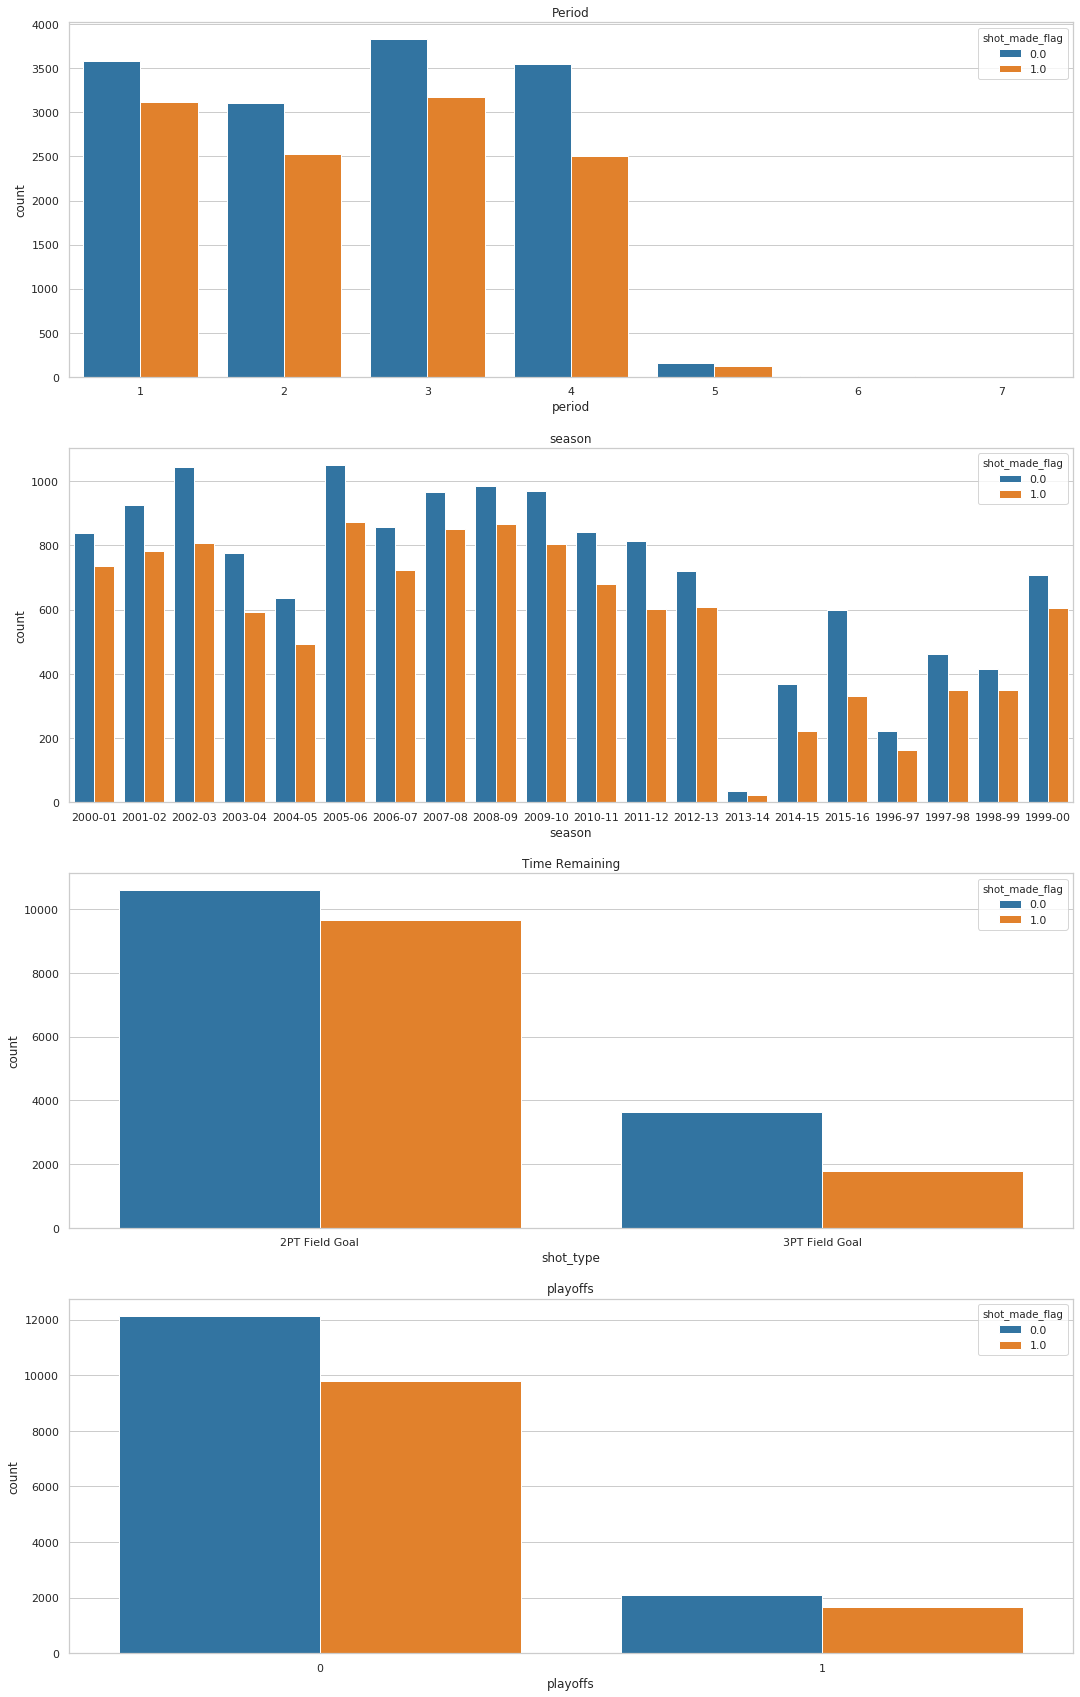

In [0]:
f, axr = plt.subplots(4,figsize=(18,30))

sns.countplot(x='period',hue='shot_made_flag',data=df_train,ax=axr[0])
sns.countplot(x='season', hue='shot_made_flag',data=df_train,ax=axr[1])
sns.countplot(x='shot_type',hue='shot_made_flag',data=df_train,ax=axr[2])
sns.countplot(x='playoffs',hue='shot_made_flag',data=df_train,ax=axr[3])


axr[0].set_title('Period')
axr[1].set_title('season')
axr[2].set_title('Time Remaining')
axr[3].set_title('playoffs')



Now we have to analyze match statistics based on his away and home matches. But there is no column specifying his home and away so we create a column from the existing matchup column.

If see closely there are @ and vs values in the column and what it actually means is that @ means lakers is the away team and vs means Lakers is the home team.




In [0]:
df_train['home_or_away'] = df_train.matchup.apply(lambda x:'home' if x.find('@')==-1 else 'away') #If substring doesn't exist inside the string, it returns -1 else it returns the index of the substring
df_train['home_or_away']= df_train['home_or_away'].astype('category')

In [0]:
df_train=df_train.drop('matchup',axis=1)

Now Lets see how has he fared against each team home and away

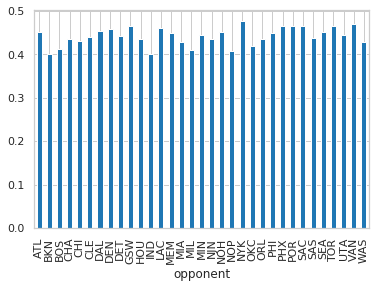

In [0]:
df_train.groupby('opponent')['shot_made_flag'].mean().plot(kind='bar')

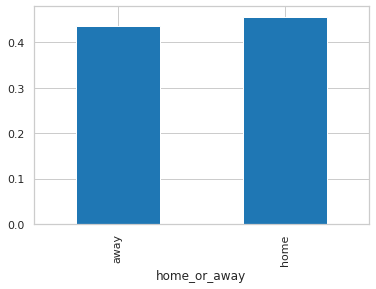

In [0]:
df_train.groupby('home_or_away')['shot_made_flag'].mean().plot(kind='bar')

It is obvious that in front of the Laker's audience he performed the best and his form dipped not by much in away game.

In [0]:
df_train.dtypes

action_type                 object
combined_shot_type          object
loc_x                        int64
loc_y                        int64
period                       int64
playoffs                     int64
season                      object
shot_distance                int64
shot_made_flag             float64
shot_type                   object
shot_zone_area              object
shot_zone_basic             object
shot_zone_range             object
team_id                      int64
opponent                    object
game_year                    int64
game_month                   int64
game_day                     int64
Time_before_period_end       int64
Last_30_secs                  bool
home_or_away              category
dtype: object

In [0]:
data["combined_shot_type"] = data["combined_shot_type"].astype('category')
data["period"] = data["period"].astype('object')
data["playoffs"] = data["playoffs"].astype('category')
data["season"] = data["season"].astype('category')
data["shot_made_flag"] = data["shot_made_flag"].astype('category')
data["shot_type"] = data["shot_type"].astype('category')

In [0]:
data_copied = df_train.copy() 